# Trump & Twitter

## Goal: analyze Donald Trump's tweets

*Credit to UC Berkeley Data100 Fall 2019 staff for assignment prompt and code outline

## Imports:

In [91]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re
import warnings
warnings.filterwarnings('ignore')

## Part 1: Importing the Data

In [92]:
# Download the dataset
from ds100_utils import fetch_and_cache
data_url = 'http://www.ds100.org/fa19/assets/datasets/hw4-realdonaldtrump_tweets.json.zip'
file_name = 'hw4-realdonaldtrump_tweets.json.zip'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Thu Dec 17 21:02:55 2020
MD5 hash of file: 664c6f85e94ea09e1507eedd7626adc5
Located at data/hw4-realdonaldtrump_tweets.json.zip


In [93]:
# Unzip the dataset
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open('hw4-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

### 1a) Constructing 'trump' dataframe containing data from all the tweets stored in all_tweets

In [94]:
#index is id of each tweet
#time encoded as datetime object
#source device of the tweet
#text ofthe tweet
# retweet count of tweet

trump = pd.DataFrame({
    'time': pd.to_datetime([t['created_at'] for t in all_tweets]),
    'source': [t['source'] for t in all_tweets],
    'text': [t['text'] if "text" in t else t['full_text'] for t in all_tweets],
    'retweet_count': [t["retweet_count"] for t in all_tweets],
}, index=[t['id'] for t in all_tweets],
   columns=['time', 'source', 'text', 'retweet_count'],
).sort_index()
trump = reindexed.set_index('id')
trump.head()

,time,source,text,retweet_count
id,,,,
786204978629185536,2016-10-12 14:00:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915
786201435486781440,2016-10-12 13:46:43+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609
786189446274248704,2016-10-12 12:59:05+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329
786054986534969344,2016-10-12 04:04:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789
786007502639038464,2016-10-12 00:56:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761


## Part 2: Tweet Source Analysis

### 2a) Example of a tweet

In [95]:
from pprint import pprint
pprint(all_tweets[-1])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 18:40:18 +0000 2018',
 'display_text_range': [0, 174],
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 52115,
 'favorited': False,
 'full_text': 'Just spoke with the Crown Prince of Saudi Arabia who totally '
              'denied any knowledge of what took place in their Turkish '
              'Consulate. He was with Secretary of State Mike Pompeo...',
 'geo': None,
 'id': 1052268011900555265,
 'id_str': '1052268011900555265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 13493,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'user': {'contributors_enabled': False,
  

### 2b) Looking into source field

In [96]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

### 2c) Cleaning source field

In [97]:
#removing the HTML tags from each source entry.
trump['source'] = trump['source'].str.replace('<[^<]+?>', '')
trump.head()

,time,source,text,retweet_count
id,,,,
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761


### 2c) Devices used to tweet

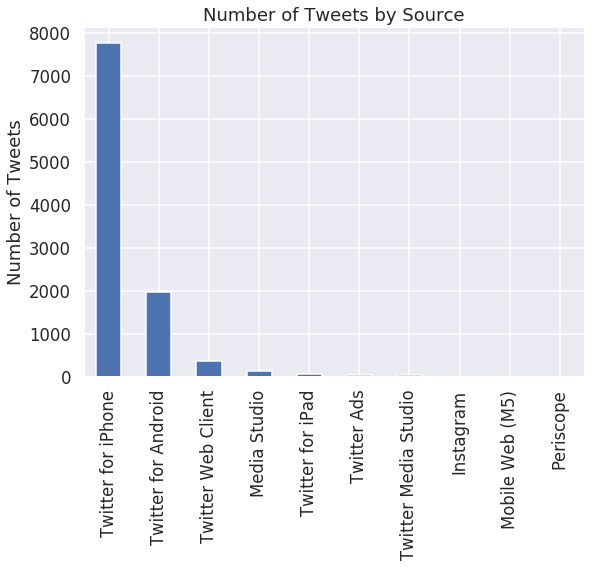

In [98]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

### 3a) Which device does Trump use?

In [99]:
#convert date to fractional year to be plotted as a distribution
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)

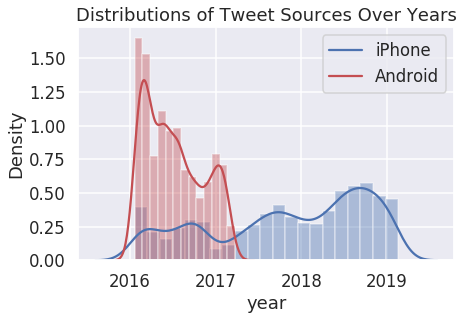

In [100]:
iphone_filter = trump.loc[trump['source'].isin(['Twitter for iPhone'])]
android_filter = trump.loc[trump['source'].isin(['Twitter for Android'])]

sns.distplot(iphone_filter['year'],color="b")
sns.distplot(android_filter['year'],color="r")

plt.title('Distributions of Tweet Sources Over Years')
plt.legend(['iPhone','Android'])

### 4a) Is there a difference between Trump's tweet behavior across these devices?

#### Checking if Trump's tweets from an Android device come at different times than his tweets from an iPhone.

In [101]:
for tweet in all_tweets[:3]:
    print(tweet['created_at'])

Wed Oct 12 14:00:48 +0000 2016
Wed Oct 12 13:46:43 +0000 2016
Wed Oct 12 12:59:05 +0000 2016


In [102]:
#Convert  tweet times to US Eastern Time (New York and Washington D.C)
trump['est_time'] = (
    trump['time'].dt.tz_convert("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head()

,time,source,text,retweet_count,year,est_time
id,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915,2016.778689,2016-10-12 09:00:48-05:00
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609,2016.778689,2016-10-12 08:46:43-05:00
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329,2016.778689,2016-10-12 07:59:05-05:00
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789,2016.778689,2016-10-11 23:04:47-05:00
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761,2016.778689,2016-10-11 19:56:06-05:00


In [103]:
#Add hour column
trump['hour'] = (trump['est_time'].dt.hour) + (trump['time'].dt.minute/60) + (trump['time'].dt.second/60**2)

### 4a) Tweet hours for different tweet sources

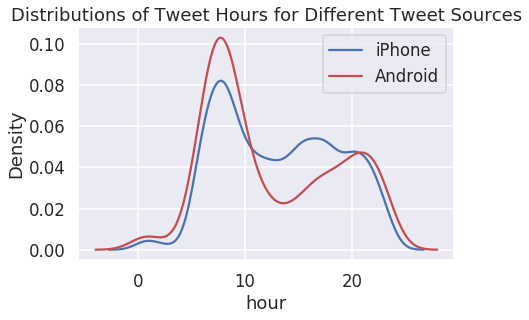

In [104]:
iphone_filter = trump.loc[trump['source'].isin(['Twitter for iPhone'])]
android_filter = trump.loc[trump['source'].isin(['Twitter for Android'])]

sns.distplot(iphone_filter['hour'],color="b",hist=False,label='iPhone')
sns.distplot(android_filter['hour'],color="r",hist=False,label='Android')

plt.title('Distributions of Tweet Hours for Different Tweet Sources')
plt.legend();

## Part 3: Sentiment Analysis
Using the words in Trump's tweets to calculate a measure of the sentiment of the tweet.

In [105]:
#VADER lexicon gives the sentiment of individual words
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



In [106]:
#Read vader_lexicon.txt into a DataFrame called sent

#index of df is words in the lexicon
#polarity is polarity of each word

sent = pd.read_csv('vader_lexicon.txt', sep="\t", header=None)
sent = sent.iloc[:,0:2]
sent.columns = ['0','polarity'] 
sent.set_index('0', inplace=True)
sent.head()

,polarity
0,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [107]:
#find the sentiment of each word for each tweet
#then calculate sentiment of each tweet by taking the sum of the sentiments of its words
trump['text'] = trump['text'].str.lower().to_frame()
trump.head()

,time,source,text,retweet_count,year,est_time,hour
id,,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,pay to play politics. \n#crookedhillary https://t.co/wjsl8itvvk,24915,2016.778689,2016-10-12 09:00:48-05:00,9.013333
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,very little pick-up by the dishonest media of incredible information provided by wikileaks. so dishonest! rigged system!,22609,2016.778689,2016-10-12 08:46:43-05:00,8.778611
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329,2016.778689,2016-10-12 07:59:05-05:00,7.984722
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,thank you florida- a movement that has never been seen before and will never be seen again. lets get out &amp;… https://t.co/t9xm9wfdzi,18789,2016.778689,2016-10-11 23:04:47-05:00,23.079722
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"join me thursday in florida &amp; ohio!\nwest palm beach, fl at noon:\nhttps://t.co/jwbznqhxg9\ncincinnati, oh this 7:30pm:\nhttps://t.co/5w2uhalpix",7761,2016.778689,2016-10-11 19:56:06-05:00,19.935000


In [108]:
#Remove punctuation 
punct_re = r'[^\w\s]'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ')

In [109]:
#Convert the tweets into 'tidy format' to make the sentiments easier to calculate
tidy_format = trump['no_punc'].str.split(expand=True)
tidy_format = tidy_format.stack().to_frame().reset_index().set_index('id')
tidy_format.columns = ['num','word'] 
tidy_format.head()

,num,word
id,,
786204978629185536,0,pay
786204978629185536,1,to
786204978629185536,2,play
786204978629185536,3,politics
786204978629185536,4,crookedhillary


In [110]:
#Add polarity column to the trump table
sent = sent.reset_index().rename(columns = {'0':'word'}).set_index('word')

polar = tidy_format.merge(sent,left_on='word',right_index = True,how='left').reset_index().groupby('id').agg(np.sum).sort_index()
trump['polarity'] = polar['polarity']

In [111]:
#Use of VADER to find most negative tweets

print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

In [112]:
#Use of VADER to find most positive tweets

print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

### Tweets Containing NY Times and Fox

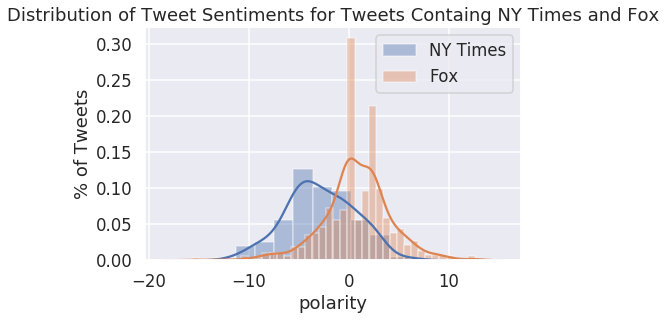

In [113]:
ny = tidy_format[tidy_format['word'].str.contains('nytimes')].index.to_list()
fox = tidy_format[tidy_format['word'].str.contains('fox')].index.to_list()


ny_polar =  trump.loc[ny,:]['polarity']
fox_polar = trump.loc[fox,:]['polarity']


sns.distplot(ny_polar, label='NY Times')
sns.distplot(fox_polar, label='Fox')
plt.ylabel('% of Tweets')
plt.title('Distribution of Tweet Sentiments for Tweets Containg NY Times and Fox')
plt.legend();